Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the Datasets

In [89]:
games = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

Exploratory Data Analysis

In [90]:
games.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [91]:
games.shape

(756, 18)

In [92]:
games_info = games.info()
games_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [93]:
games_describe = games.describe(include='all')
games_describe

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,12,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,IPL-2013,Mumbai,17-04-2011,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,76,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [94]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [95]:
deliveries.shape

(150460, 21)

In [96]:
deliveries_info = deliveries.info()
deliveries_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [97]:
deliveries_describe = deliveries.describe(include='all')
deliveries_describe

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,150460.000000,150460.000000,150460,150460,150460.000000,150460.000000,150460,150460,150460,150460.000000,...,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,7438,7438,5369
unique,NaN,NaN,14,14,NaN,NaN,461,458,356,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436,9,451
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,G Gambhir,Harbhajan Singh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,KD Karthik
freq,NaN,NaN,18943,18879,NaN,NaN,3494,3635,2989,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134,4373,127
mean,318.281317,1.482188,NaN,NaN,10.142649,3.616483,NaN,NaN,NaN,0.000538,...,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466,NaN,NaN,NaN
std,182.955531,0.501768,NaN,NaN,5.674338,1.807698,NaN,NaN,NaN,0.023196,...,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,161.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,319.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,476.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


Top performing teams: Analyze which teams have won the most matches. We Lists the teams with the most wins, useful for analyzing team dominance.

In [98]:
top_teams = games['winner'].value_counts().head(5)
print("\nTop performing teams:")
print(top_teams)


Top performing teams:
winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Name: count, dtype: int64


Impact of toss on match outcome: Determine if winning the toss significantly influences winning the match. We can Check the hypothesis that winning the toss could give a strategic advantage.

In [99]:
toss_impact = games[games['toss_winner'] == games['winner']].shape[0] / games.shape[0]
print("\nPercentage of matches where the toss winner won the match:", toss_impact * 100)


Percentage of matches where the toss winner won the match: 51.98412698412699


Player performance: Identify top players based on runs. Focuses on batsmen, identifying top performers by runs scored.

In [100]:
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)
print("\nTop batsmen by runs:")
print(top_batsmen)


Top batsmen by runs:
batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64


Match aggregates: Calculate aggregate statistics like total runs, highest scores, etc.Analyzes total runs per match to gauge scoring trends and identifies the highest individual scores.

In [101]:
total_runs_per_match = deliveries.groupby('match_id')['total_runs'].sum()
print("\nTotal runs per match:")
print(total_runs_per_match.head())



Total runs per match:
match_id
1    379
2    371
3    367
4    327
5    299
Name: total_runs, dtype: int64


In [102]:
highest_scores = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()
highest_scores = highest_scores.sort_values(by='batsman_runs', ascending=False).head(5)
print("\nHighest individual scores:")
print(highest_scores)


Highest individual scores:
      match_id         batsman  batsman_runs
6200       411        CH Gayle           175
900         60     BB McCullum           158
8426       562  AB de Villiers           133
9257       620  AB de Villiers           129
5585       372        CH Gayle           128


Most Economical Bowlers: Determine bowlers with the best economy rates over a significant number of deliveries. Identifies bowlers who are effective at minimizing run rates, which is crucial in limiting the opposition’s scoring.

In [103]:
# Filter to bowlers with more than 300 balls bowled
balls_bowled = deliveries.groupby('bowler')['ball'].count()
qualified_bowlers = balls_bowled[balls_bowled > 300]

# Calculate economy
runs_conceded = deliveries.groupby('bowler')['total_runs'].sum()
bowler_economy = (runs_conceded / (balls_bowled / 6)).loc[qualified_bowlers.index].sort_values().head(10)
print("\nMost Economical Bowlers:")
print(bowler_economy)


Most Economical Bowlers:
bowler
SP Narine           6.395706
R Ashwin            6.490886
DW Steyn            6.600278
A Kumble            6.646999
GD McGrath          6.674772
M Muralitharan      6.698292
Rashid Khan         6.731707
SL Malinga          6.757238
RE van der Merwe    6.791209
DL Vettori          6.833121
dtype: float64


Most Common Dismissal Types: Analyze the frequency of different dismissal types. Provides insights into how players typically get out, which can inform fielding strategies.

In [104]:
dismissal_counts = deliveries['dismissal_kind'].value_counts()
print("\nMost Common Dismissal Types:")
print(dismissal_counts)



Most Common Dismissal Types:
dismissal_kind
caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: count, dtype: int64


Team Win-Loss Ratio: Calculate each team's win/loss ratio to gauge their overall performance. Helps to understand team performance and consistency over seasons.

In [105]:
wins = games['winner'].value_counts()
losses = games.shape[0] - wins  # assuming a team loses if it doesn't win
win_loss_ratio = wins / losses
print("\nTeam Win-Loss Ratios:")
print(win_loss_ratio)


Team Win-Loss Ratios:
winner
Mumbai Indians                 0.168470
Chennai Super Kings            0.152439
Kolkata Knight Riders          0.138554
Royal Challengers Bangalore    0.125000
Kings XI Punjab                0.121662
Rajasthan Royals               0.110132
Delhi Daredevils               0.097242
Sunrisers Hyderabad            0.083095
Deccan Chargers                0.039890
Gujarat Lions                  0.017497
Pune Warriors                  0.016129
Rising Pune Supergiant         0.013405
Delhi Capitals                 0.013405
Kochi Tuskers Kerala           0.008000
Rising Pune Supergiants        0.006658
Name: count, dtype: float64


Average Runs per Over by Team: Compute the average runs scored per over by each team. This metric can highlight the offensive strengths of teams during their innings.

In [106]:
total_runs = deliveries.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()
total_overs = deliveries.groupby(['match_id', 'inning', 'batting_team'])['over'].nunique().reset_index()
average_runs_per_over = (total_runs['total_runs'] / total_overs['over']).groupby(total_runs['batting_team']).mean().sort_values(ascending=False)
print("\nAverage Runs per Over by Team:")
print(average_runs_per_over)


Average Runs per Over by Team:
batting_team
Gujarat Lions                  8.364491
Royal Challengers Bangalore    8.266989
Chennai Super Kings            8.209190
Kings XI Punjab                8.175123
Sunrisers Hyderabad            8.111578
Mumbai Indians                 8.066426
Rising Pune Supergiants        8.055483
Kolkata Knight Riders          7.957277
Rising Pune Supergiant         7.940809
Rajasthan Royals               7.900119
Delhi Daredevils               7.885567
Deccan Chargers                7.822486
Kochi Tuskers Kerala           7.746451
Pune Warriors                  7.192257
dtype: float64


Most Frequent Player of the Match: Identify players who have received the 'Player of the Match' award most frequently. Sheds light on players who consistently perform exceptionally, possibly influencing match outcomes significantly.

In [107]:
player_of_match_counts = games['player_of_match'].value_counts().head(10)
print("\nMost Frequent Player of the Match:")
print(player_of_match_counts)


Most Frequent Player of the Match:
player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64


Seasonal Performance Trends: Track the performance of teams across different seasons. Helps to track how teams have evolved over seasons and identify dominant periods.

In [108]:
seasonal_performance = games.groupby(['Season', 'winner']).size().unstack(fill_value=0)
print("\nSeasonal Performance Trends:")
print(seasonal_performance)



Seasonal Performance Trends:
winner    Chennai Super Kings  Deccan Chargers  Delhi Capitals  \
Season                                                           
IPL-2008                    9                2               0   
IPL-2009                    8                9               0   
IPL-2010                    9                8               0   
IPL-2011                   11                6               0   
IPL-2012                   10                4               0   
IPL-2013                   12                0               0   
IPL-2014                   10                0               0   
IPL-2015                   10                0               0   
IPL-2016                    0                0               0   
IPL-2017                    0                0               0   
IPL-2018                   11                0               0   
IPL-2019                   10                0              10   

winner    Delhi Daredevils  Gujarat Lions  Ki


Bowler Strike Rates: Calculate the strike rates for bowlers, which indicates the average number of balls bowled per wicket taken. Useful for identifying highly effective bowlers in terms of taking wickets quickly.

In [109]:
# Calculate wickets taken by each bowler (excluding run-outs)
wickets = deliveries[deliveries['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
bowler_wickets = wickets.groupby('bowler').size()
bowler_balls = deliveries.groupby('bowler').size()
bowler_strike_rate = (bowler_balls / bowler_wickets).sort_values().dropna()
print("\nBowler Strike Rates:")
print(bowler_strike_rate.head(10))  # Display top 10


Bowler Strike Rates:
bowler
AC Gilchrist      1.000000
Sachin Baby       5.000000
AM Rahane         6.000000
LA Carseldine     7.000000
SS Mundhe         7.000000
DAJ Bracewell     8.333333
Shoaib Akhtar     9.200000
AJ Tye           10.666667
D du Preez       10.750000
A Zampa          11.842105
dtype: float64


Impact of Winning the Toss and Choosing to Bat vs. Field: Determine the success rate based on toss decisions. Provides insights into the strategic decisions made at the toss and their outcomes.

In [110]:
toss_impact = games.groupby(['toss_winner', 'toss_decision']).agg({'winner': lambda x: (x == x.shift()).mean()})
print("\nImpact of Winning Toss and Choosing to Bat vs. Field:")
print(toss_impact)


Impact of Winning Toss and Choosing to Bat vs. Field:
                                             winner
toss_winner                 toss_decision          
Chennai Super Kings         bat            0.375000
                            field          0.365854
Deccan Chargers             bat            0.208333
                            field          0.105263
Delhi Capitals              bat            0.000000
                            field          0.375000
Delhi Daredevils            bat            0.172414
                            field          0.176471
Gujarat Lions               bat            0.000000
                            field          0.357143
Kings XI Punjab             bat            0.115385
                            field          0.327273
Kochi Tuskers Kerala        bat            0.000000
                            field          0.400000
Kolkata Knight Riders       bat            0.266667
                            field          0.370968
Mumbai In

Most Effective Fielders: Look at the number of catches and run-outs facilitated by fielders. Highlights fielders with exceptional skills in catching or affecting run-outs, which can be crucial in tight games.

In [111]:
fielder_efficiency = deliveries[deliveries['dismissal_kind'].isin(['caught', 'run out'])]['fielder'].value_counts().head(10)
print("\nMost Effective Fielders:")
print(fielder_efficiency)


Most Effective Fielders:
fielder
KD Karthik        101
MS Dhoni           96
SK Raina           96
AB de Villiers     94
RV Uthappa         83
RG Sharma          79
V Kohli            74
KA Pollard         72
NV Ojha            72
PA Patel           70
Name: count, dtype: int64


Distribution of Scores by Batsmen: Analyze the frequency distribution of scores by top batsmen. Offers insights into the scoring patterns and consistency of top batsmen.

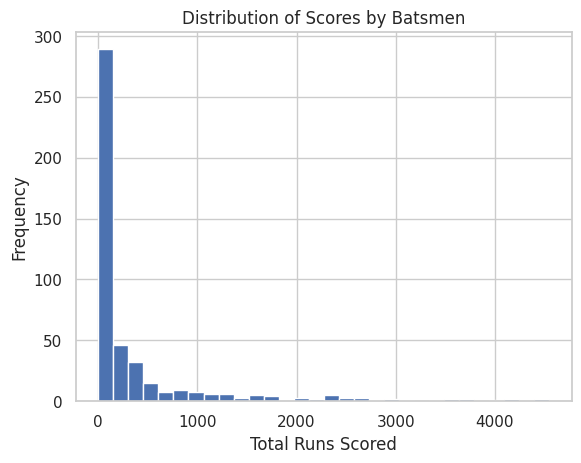

In [112]:
import matplotlib.pyplot as plt

top_batsmen_scores = deliveries.groupby(['batsman']).agg({'batsman_runs': 'sum'})
top_batsmen_scores.hist(bins=30)
plt.title('Distribution of Scores by Batsmen')
plt.xlabel('Total Runs Scored')
plt.ylabel('Frequency')
plt.show()

Detailed Analysis of Extras Given by Teams: Break down the types and numbers of extra runs given by teams throughout the seasons. Helps to identify teams' discipline in bowling and areas that may need improvement in avoiding giving away free runs.

In [113]:
extras_summary = deliveries.groupby(['bowling_team']).agg({'bye_runs': 'sum', 'legbye_runs': 'sum', 'wide_runs': 'sum', 'noball_runs': 'sum', 'penalty_runs': 'sum'})
print("\nDetailed Analysis of Extras Given by Teams:")
print(extras_summary)


Detailed Analysis of Extras Given by Teams:
                             bye_runs  legbye_runs  wide_runs  noball_runs  \
bowling_team                                                                 
Chennai Super Kings                59          361        526           56   
Deccan Chargers                    62          215        328           49   
Delhi Daredevils                   76          409        614           88   
Gujarat Lions                      10           64        107            7   
Kings XI Punjab                    83          392        668           87   
Kochi Tuskers Kerala                5           41         56            8   
Kolkata Knight Riders              98          382        658           66   
Mumbai Indians                     96          414        786           96   
Pune Warriors                      38           97        174           26   
Rajasthan Royals                   68          339        586           65   
Rising Pune Supergi

##Data Visualization

Let's perform Exploratory Data Analysis (EDA) and visualize key aspects of these datasets. We'll focus on:

Distribution of Total Runs Scored in Each Match: The histogram shows the distribution of total runs scored across all matches. Most matches feature a total run count centered around a common range, indicating typical scoring behavior in these games.

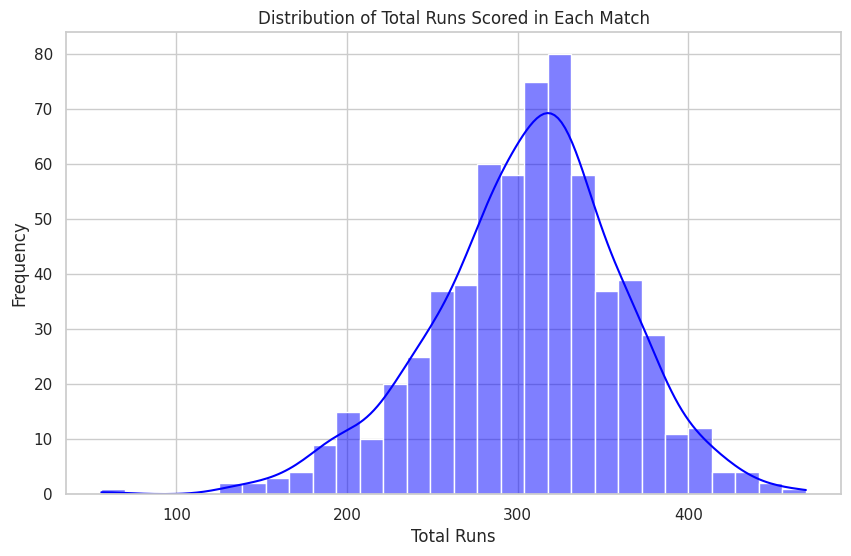

In [114]:
# Aggregate total runs scored in each match from deliveries.csv
total_runs_per_match = deliveries.groupby('match_id')['total_runs'].sum()

# Create a DataFrame for the total runs per match
total_runs_per_match_df = total_runs_per_match.reset_index()

# Merge this data with games_df to get the corresponding match details
match_runs_df = games[['id', 'Season']].merge(total_runs_per_match_df, left_on='id', right_on='match_id')
match_runs_df.rename(columns={'total_runs': 'Total Runs'}, inplace=True)


# Plotting total runs scored in each match
plt.figure(figsize=(10, 6))
sns.histplot(match_runs_df['Total Runs'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Runs Scored in Each Match')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()



Top 5 Players by Player of the Match Awards: This chart highlights the players who have won the most 'Player of the Match' awards. These individuals likely had a significant impact on their games, showcasing their performance excellence.

<ipython-input-115-b2d504e95db9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette="coolwarm")


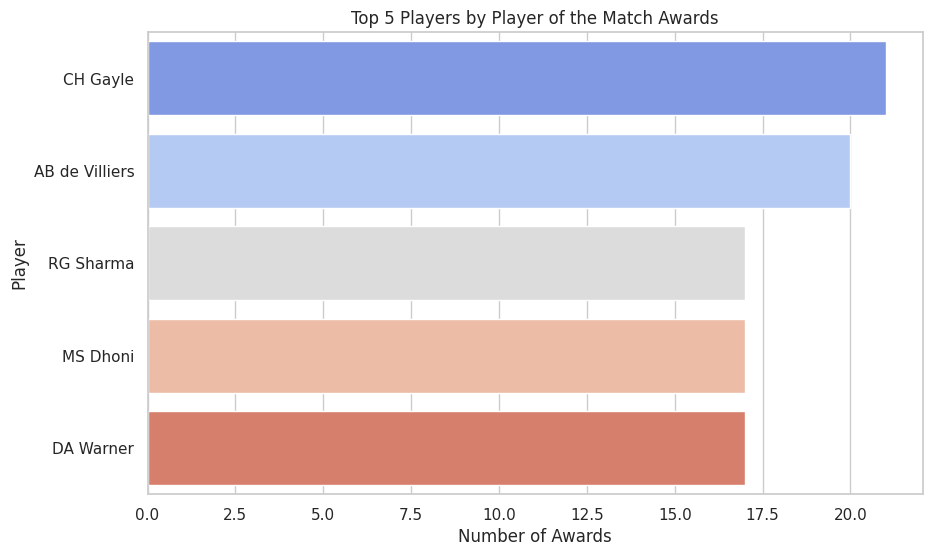

In [115]:
# Top 5 players by 'Player of the Match' awards
top_players = games['player_of_match'].value_counts().head(5)

# Plotting top 5 players by player of the match awards
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index, palette="coolwarm")
plt.title('Top 5 Players by Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()

Win Margins (by runs and wickets): Analyzing how dominant some teams were in their victories. These histograms show how often teams win by specific run or wicket margins, which could reflect the competitive balance in the games.

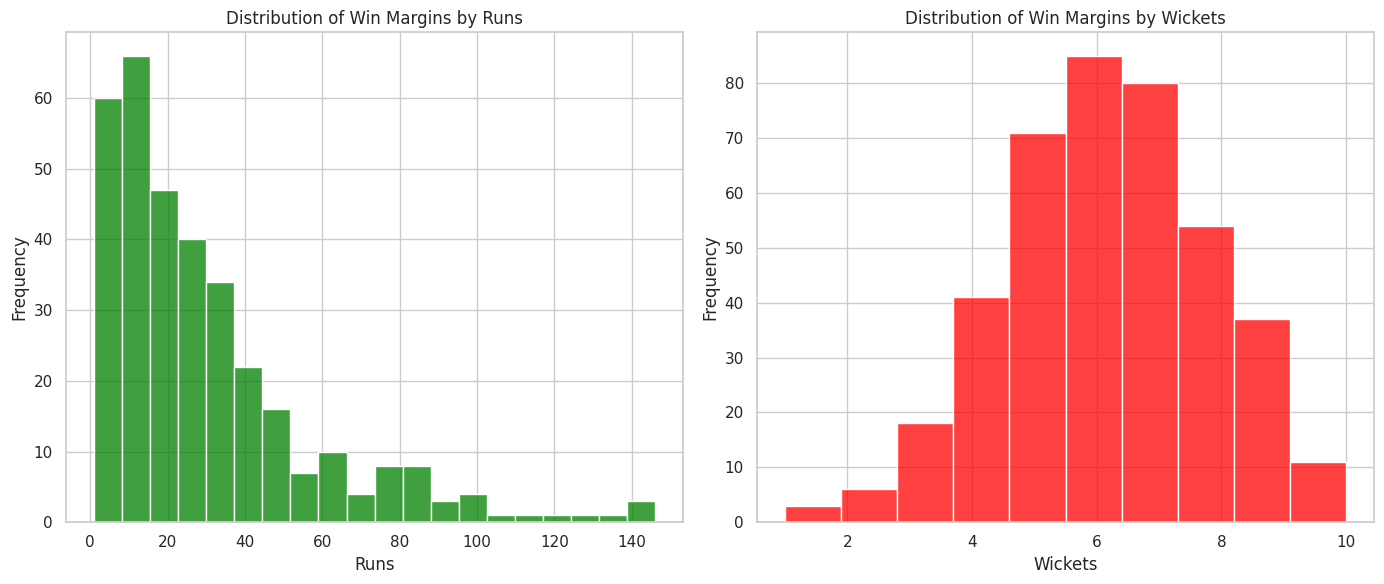

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization aesthetics
sns.set(style="whitegrid")

# 1. Win Margins (by runs and wickets)
win_by_runs = games[games['win_by_runs'] > 0]['win_by_runs']
win_by_wickets = games[games['win_by_wickets'] > 0]['win_by_wickets']

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for win by runs
sns.histplot(win_by_runs, bins=20, ax=ax[0], color='green')
ax[0].set_title('Distribution of Win Margins by Runs')
ax[0].set_xlabel('Runs')
ax[0].set_ylabel('Frequency')

# Histogram for win by wickets
sns.histplot(win_by_wickets, bins=10, ax=ax[1], color='red')
ax[1].set_title('Distribution of Win Margins by Wickets')
ax[1].set_xlabel('Wickets')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



Most Frequent Toss Winners: Identifying which teams often win the toss and possibly how it correlates with their match outcomes.A bar chart visualizing which teams win the toss most frequently, an aspect that can have strategic implications on the game outcome.

<ipython-input-117-3c8f3c372b09>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=toss_winners.index, x=toss_winners.values, palette="rocket")


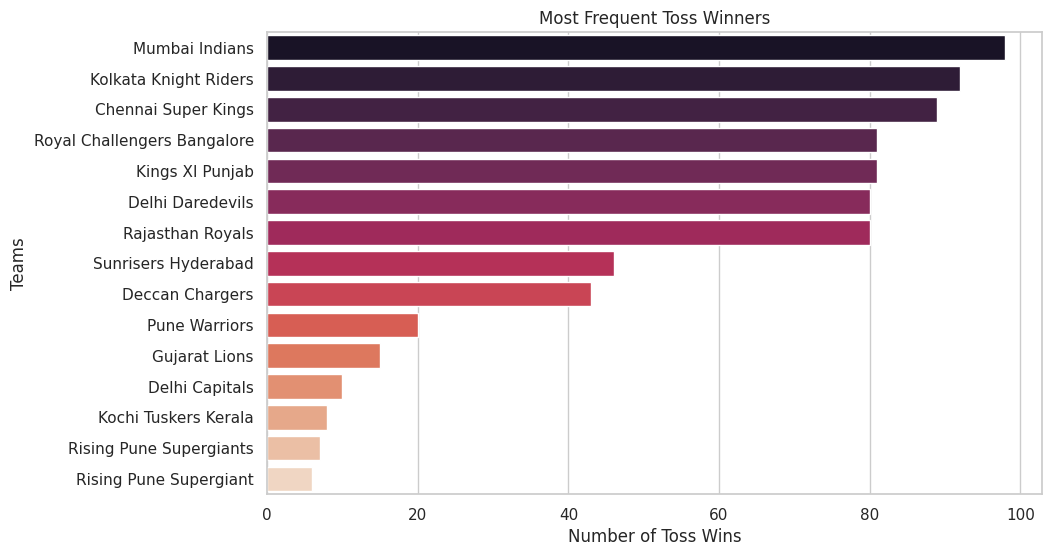

In [117]:
# 2. Most Frequent Toss Winners
toss_winners = games['toss_winner'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=toss_winners.index, x=toss_winners.values, palette="rocket")
plt.title('Most Frequent Toss Winners')
plt.xlabel('Number of Toss Wins')
plt.ylabel('Teams')
plt.show()

Season-wise winner distribution: To see which teams have been most successful in each season. A heatmap providing a visual representation of each team's performance across different seasons, highlighting dominant teams in specific seasons.

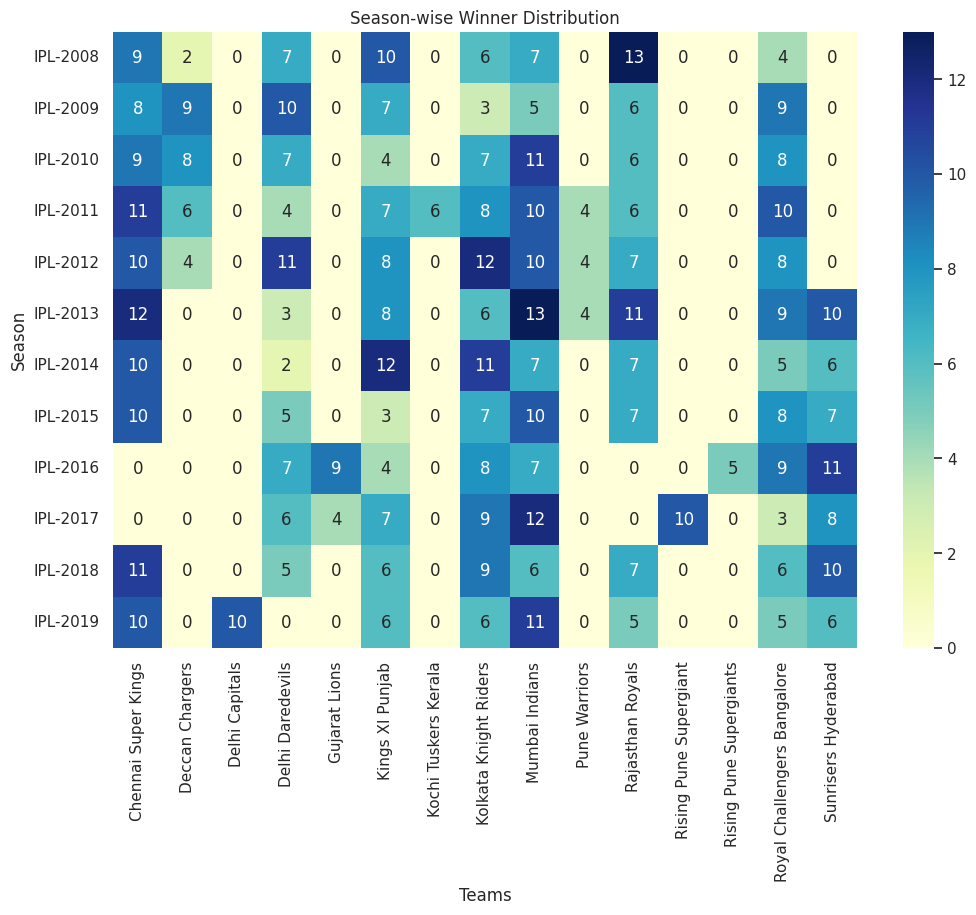

In [118]:
# 3. Season-wise winner distribution
season_winner = games.groupby('Season')['winner'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(season_winner, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Season-wise Winner Distribution')
plt.xlabel('Teams')
plt.ylabel('Season')
plt.show()

Comparison of Batting First vs. Batting Second Wins: Analyze the influence of batting order on winning matches. Helps understand whether there is a significant advantage to batting first or second in terms of winning matches.

<ipython-input-119-ccacd79bfee8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bat_first_wins.index, x=bat_first_wins.values, ax=ax[0], palette="Blues_d")
<ipython-input-119-ccacd79bfee8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bat_second_wins.index, x=bat_second_wins.values, ax=ax[1], palette="Greens_d")


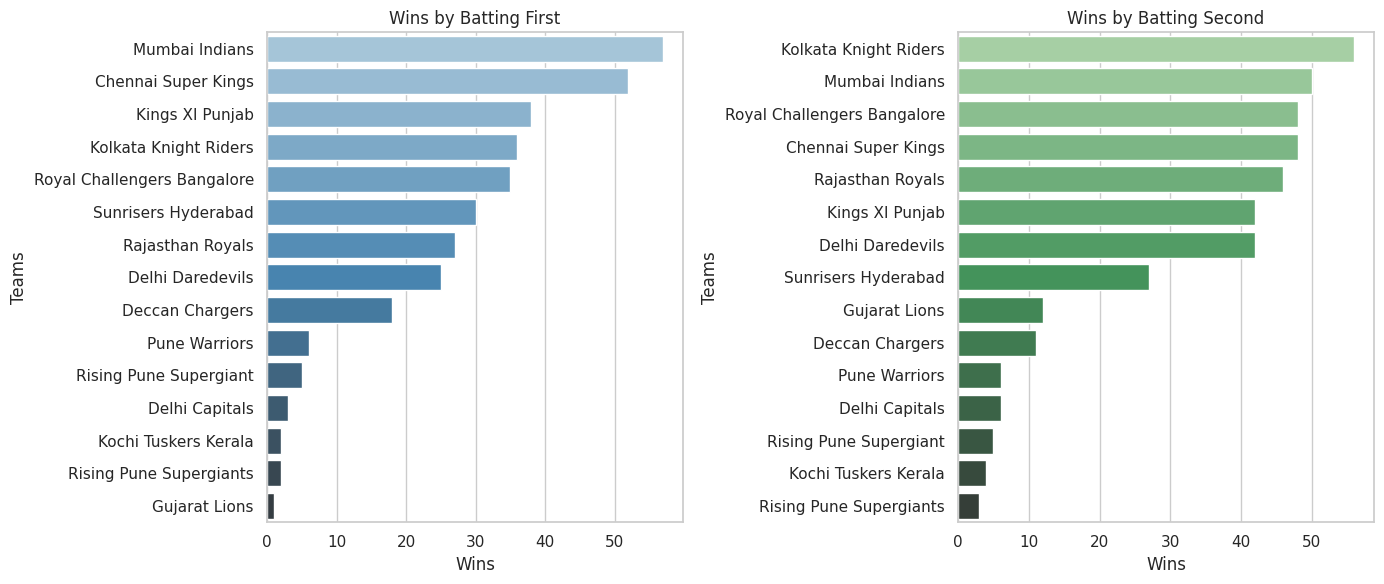

In [119]:
# Comparison of Batting First vs. Batting Second Wins
# Counting wins for batting first vs. batting second
bat_first_wins = games[games['win_by_runs'] > 0]['winner'].value_counts()
bat_second_wins = games[games['win_by_wickets'] > 0]['winner'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(y=bat_first_wins.index, x=bat_first_wins.values, ax=ax[0], palette="Blues_d")
ax[0].set_title('Wins by Batting First')
ax[0].set_xlabel('Wins')
ax[0].set_ylabel('Teams')

sns.barplot(y=bat_second_wins.index, x=bat_second_wins.values, ax=ax[1], palette="Greens_d")
ax[1].set_title('Wins by Batting Second')
ax[1].set_xlabel('Wins')
ax[1].set_ylabel('Teams')

plt.tight_layout()
plt.show()


Frequency of Different Dismissal Types: Look at how players get out most frequently during matches. Offers insights into the most common ways players are getting out, which could help teams strategize better.

<ipython-input-120-b9259c21d81e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissal_types.values, y=dismissal_types.index, palette="autumn")


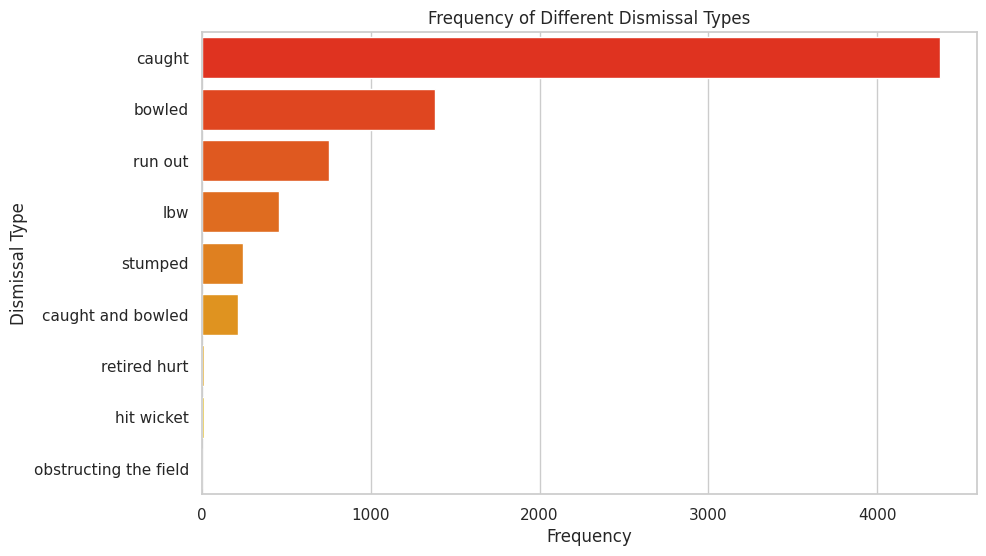

In [120]:
# Frequency of Different Dismissal Types
dismissal_types = deliveries['dismissal_kind'].value_counts().dropna()

plt.figure(figsize=(10, 6))
sns.barplot(x=dismissal_types.values, y=dismissal_types.index, palette="autumn")
plt.title('Frequency of Different Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

Team Performance at Different Venues: Analyze how teams perform at different stadiums. This heatmap shows how each team performs at various cricket venues, helping to identify which teams dominate at specific stadiums.

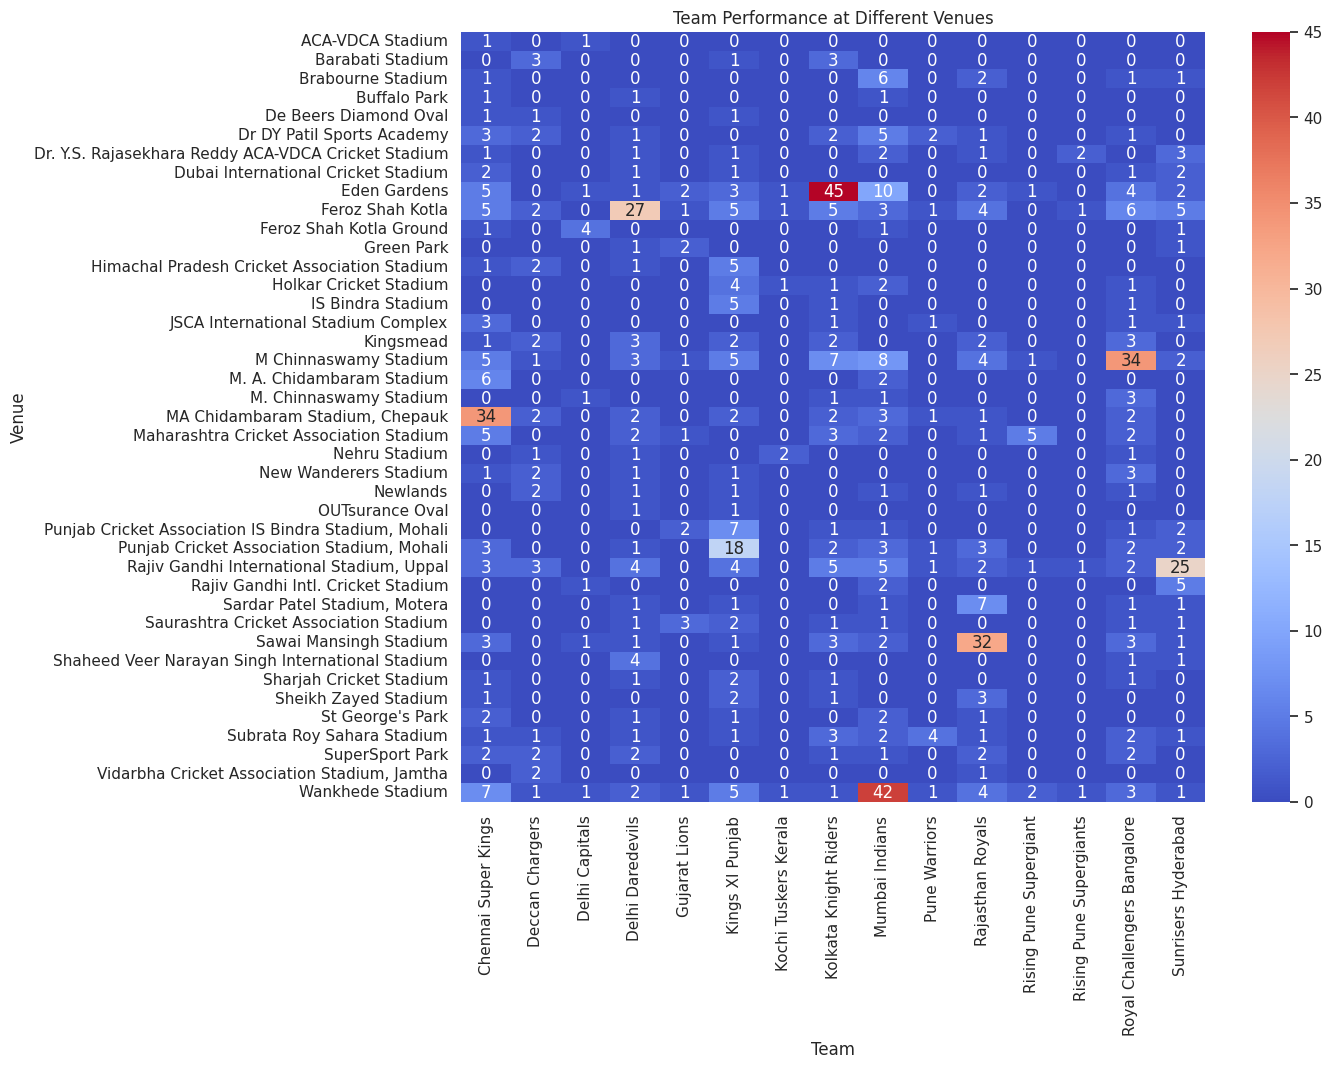

In [121]:
# Team Performance at Different Venues
# Filter data to get wins at each venue for each team
team_venue_wins = games.pivot_table(index='venue', columns='winner', values='id', aggfunc='count').fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(team_venue_wins, annot=True, cmap="coolwarm", fmt=".0f")
plt.title('Team Performance at Different Venues')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.show()


Economy Rates of Bowlers: Calculate and visualize the economy rates of bowlers to identify the most economical players.The bar chart highlights the most economical bowlers who have bowled over 200 overs, indicating players who are effective at limiting scoring.

<ipython-input-122-37ad22d4e1e4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers['economy_rate'].head(10), y=top_bowlers.index[:10], palette="viridis")


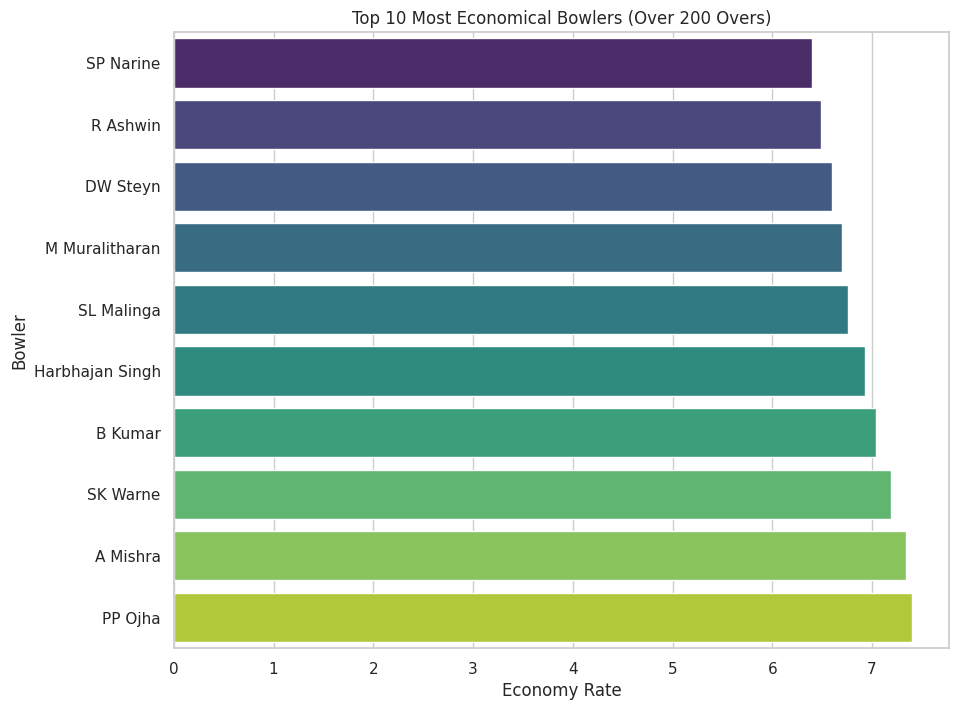

In [122]:
# Economy Rates of Bowlers
# Calculate runs conceded and balls bowled by each bowler
bowler_stats = deliveries.groupby('bowler').agg({'total_runs': 'sum', 'ball': 'count'})
# Convert balls to overs for economy rate calculation
bowler_stats['overs'] = bowler_stats['ball'] / 6
# Calculate economy rate
bowler_stats['economy_rate'] = bowler_stats['total_runs'] / bowler_stats['overs']
# Filter to show only bowlers with more than 200 overs
top_bowlers = bowler_stats[bowler_stats['overs'] > 200].sort_values(by='economy_rate')

plt.figure(figsize=(10, 8))
sns.barplot(x=top_bowlers['economy_rate'].head(10), y=top_bowlers.index[:10], palette="viridis")
plt.title('Top 10 Most Economical Bowlers (Over 200 Overs)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()


Frequency of Matches by City: This analysis will show which cities host the most matches, potentially indicating their popularity or infrastructure capabilities. Reveals which cities are the most frequent hosts, which might be related to their popularity or the presence of large, well-equipped stadiums.

<ipython-input-123-a98747e90f0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=matches_by_city.index, x=matches_by_city.values, palette="cubehelix")


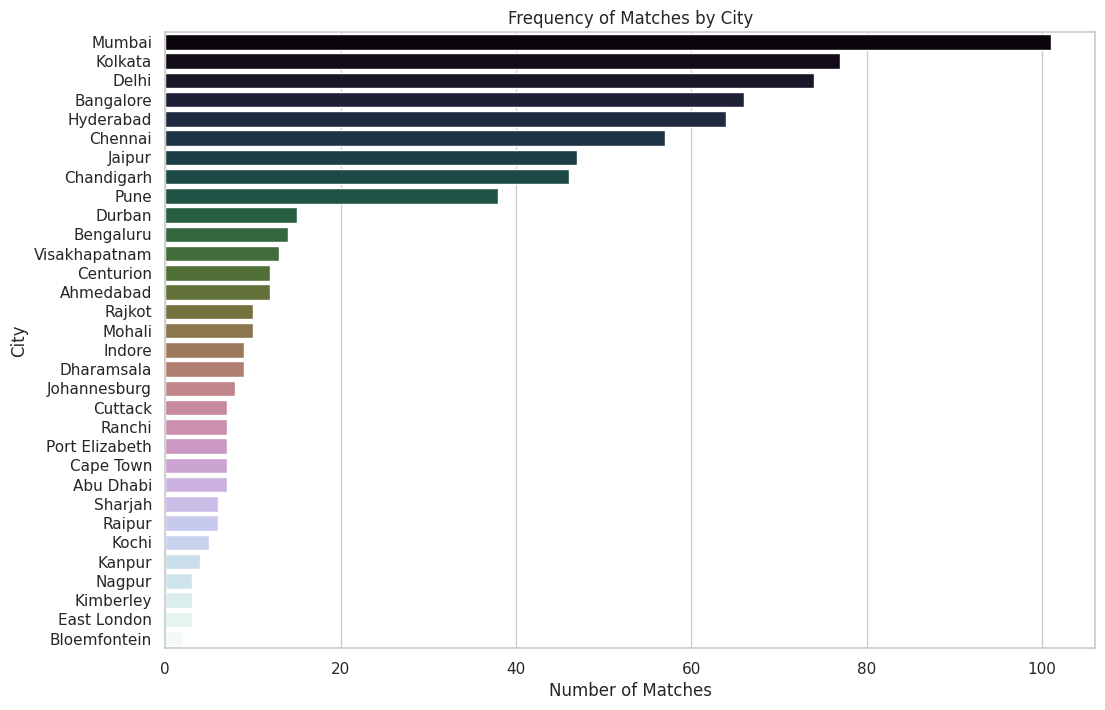

In [123]:
# Frequency of Matches by City
matches_by_city = games['city'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=matches_by_city.index, x=matches_by_city.values, palette="cubehelix")
plt.title('Frequency of Matches by City')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.show()

Most Successful Chasing Teams: Identifying teams that have a higher success rate in chasing targets. Identifies which teams have better success rates when chasing targets, suggesting strategic strengths in pressure situations.


<ipython-input-124-6ac6ed35a88d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chase_win_rate.values, y=chase_win_rate.index, palette="viridis")


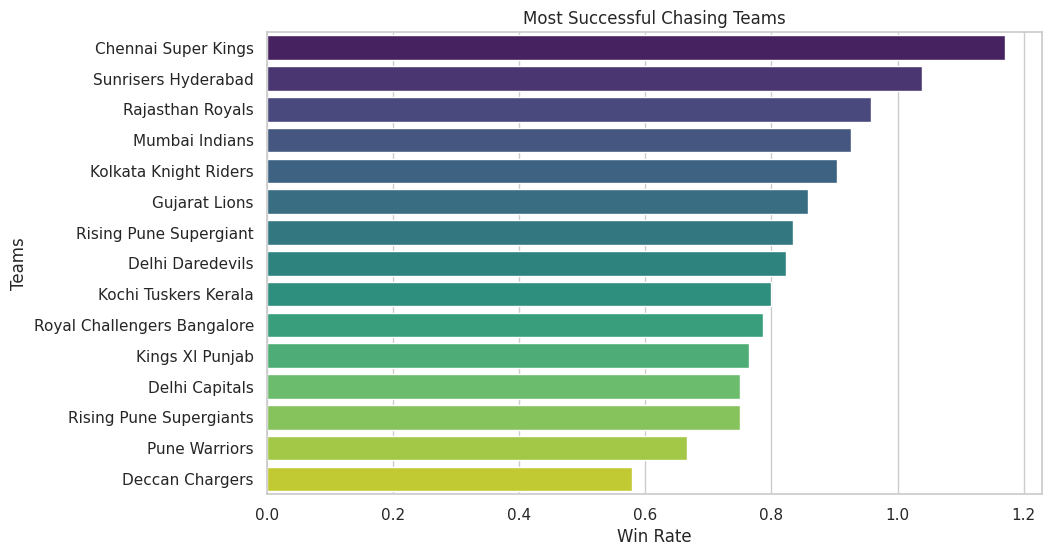

In [124]:
# Most Successful Chasing Teams
# Teams winning by chasing
chasing_wins = games[games['win_by_wickets'] > 0].groupby('winner').size()
total_chases = games[games['toss_decision'] == 'field'].groupby('toss_winner').size()
# Calculate win rate for teams while chasing
chase_win_rate = (chasing_wins / total_chases).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=chase_win_rate.values, y=chase_win_rate.index, palette="viridis")
plt.title('Most Successful Chasing Teams')
plt.xlabel('Win Rate')
plt.ylabel('Teams')
plt.show()

Analysis of Powerplays: Offers insights into how teams perform in the initial overs of the match, which are critical for setting the tone of the innings. Observing team performances during the powerplay overs (the first six overs in T20 cricket).

Average Powerplay Runs: 44.71105919003115


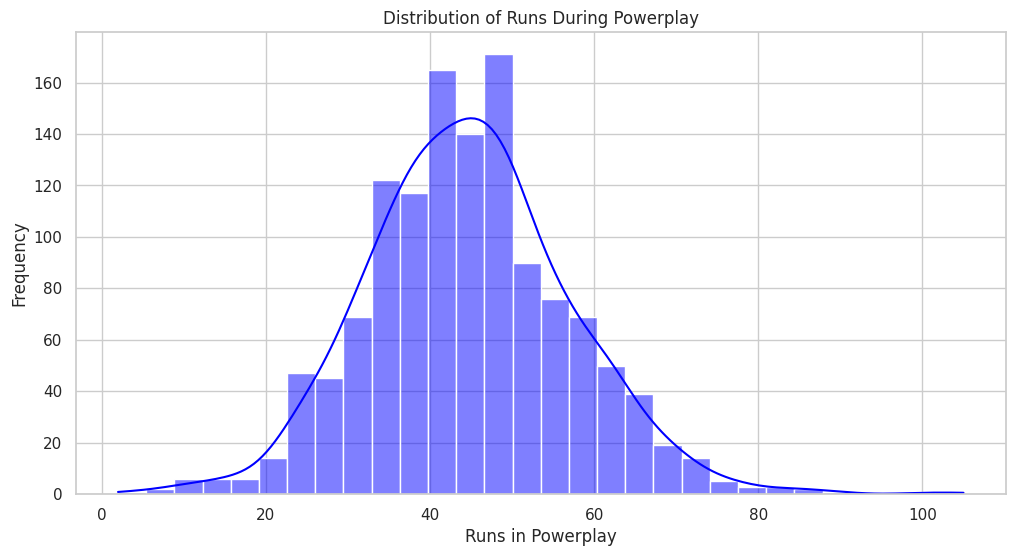

In [125]:
# Analysis of Powerplays
# Filter deliveries to only include the first 6 overs
powerplay_deliveries = deliveries[deliveries['over'] <= 6]
# Aggregate runs and calculate average runs in powerplay
powerplay_performance = powerplay_deliveries.groupby(['match_id', 'inning']).agg({'total_runs': 'sum'}).reset_index()
average_powerplay_runs = powerplay_performance['total_runs'].mean()

print("Average Powerplay Runs:", average_powerplay_runs)

# Visualize runs in powerplay overs for each match
plt.figure(figsize=(12, 6))
sns.histplot(powerplay_performance['total_runs'], bins=30, kde=True, color='blue')
plt.title('Distribution of Runs During Powerplay')
plt.xlabel('Runs in Powerplay')
plt.ylabel('Frequency')
plt.show()

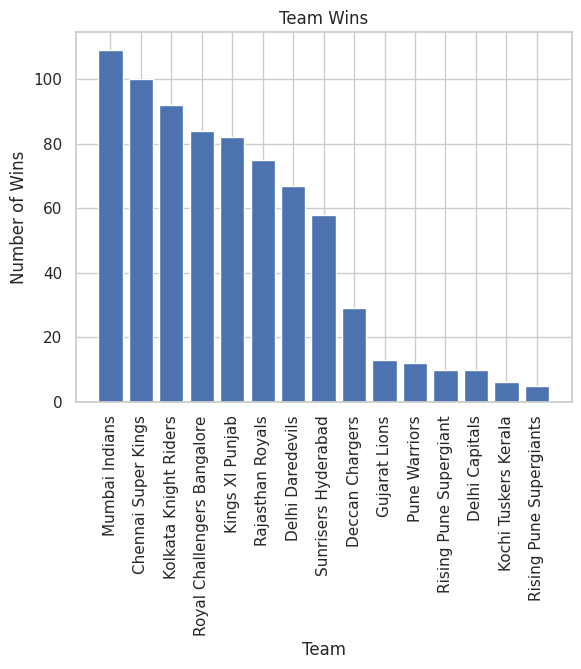

In [126]:
# Count the number of wins for each team
team_wins = games['winner'].value_counts()

# Create a bar chart of the team wins
plt.bar(team_wins.index, team_wins.values)
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Team Wins')
plt.xticks(rotation=90)
plt.show()

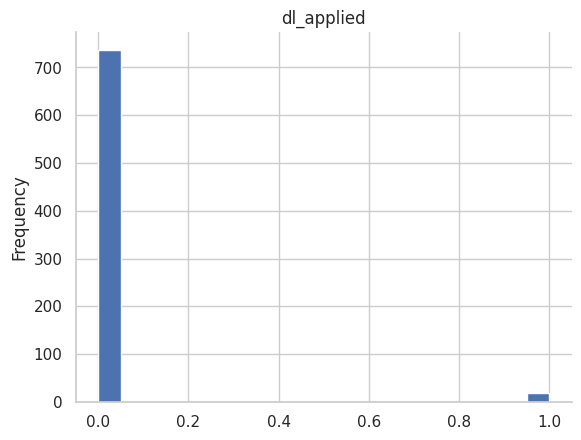

In [127]:
from matplotlib import pyplot as plt
games['dl_applied'].plot(kind='hist', bins=20, title='dl_applied')
plt.gca().spines[['top', 'right',]].set_visible(False)

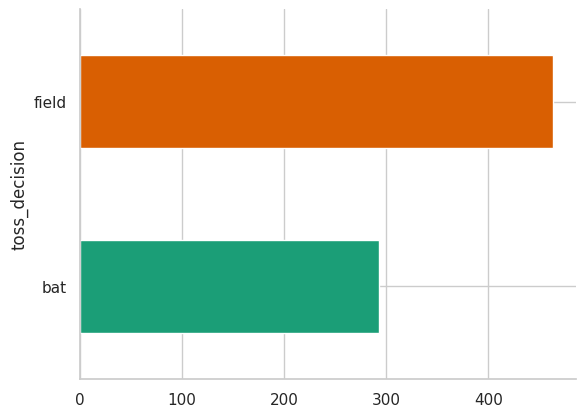

In [128]:
games.groupby('toss_decision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [129]:
total_runs_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_runs_df = total_runs_df[total_runs_df['inning'] == 1]
total_runs_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1274,632,1,138
1276,633,1,158
1278,634,1,162
1280,635,1,162


In [130]:
matches_df = games.merge(total_runs_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [131]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,IPL-2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN,632,138
632,633,IPL-2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN,633,158
633,634,IPL-2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN,634,162
634,635,IPL-2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN,635,162


In [132]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [133]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [134]:
matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['team2'] = matches_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

matches_df['team1'] = matches_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team2'] = matches_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [135]:
match_df = matches_df[matches_df['team1'].isin(teams)]
match_df = matches_df[matches_df['team2'].isin(teams)]

In [136]:
match_df.shape

(572, 20)

In [137]:
match_df['dl_applied'].value_counts()

dl_applied
0    559
1     13
Name: count, dtype: int64

In [138]:
# Taking only matches which was not affected by rain
match_df = match_df[match_df['dl_applied'] == 0]

In [139]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [140]:
delivery_df = match_df.merge(deliveries,on='match_id')

In [141]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [142]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133399,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,0,0,0,2,0,2,NaN,NaN,NaN
133400,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
133401,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,0,1,0,0,0,1,1,NaN,NaN,NaN
133402,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [143]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df['current_score']

125         1
126         1
127         1
128         3
129         7
         ... 
133399    194
133400    194
133401    195
133402    196
133403    200
Name: current_score, Length: 64436, dtype: int64

In [144]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133399,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,0,0,2,0,2,NaN,NaN,NaN,194
133400,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,194
133401,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,1,0,0,0,1,1,NaN,NaN,NaN,195
133402,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,0,0,1,0,1,NaN,NaN,NaN,196


In [145]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [146]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [147]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133399,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,...,0,2,0,2,NaN,NaN,NaN,194,14,4
133400,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,...,0,0,0,0,CJ Jordan,run out,NV Ojha,194,14,3
133401,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,...,0,0,1,1,NaN,NaN,NaN,195,13,2
133402,636,Bangalore,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,...,0,1,0,1,NaN,NaN,NaN,196,12,1


In [148]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [149]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [150]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [151]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [152]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [153]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [154]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [155]:
final_df = final_df.sample(final_df.shape[0])

In [156]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
98471,Rajasthan Royals,Chennai Super Kings,NaN,73,47,5,140,5.506849,9.319149,0


In [157]:
final_df.dropna(inplace=True)

In [158]:
final_df = final_df[final_df['balls_left'] != 0]

In [159]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [160]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
120366,Delhi Daredevils,Sunrisers Hyderabad,Raipur,143,97,9,163,5.217391,8.845361
16757,Mumbai Indians,Rajasthan Royals,Mumbai,31,51,7,103,6.260870,3.647059
39061,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,39,88,10,92,9.937500,2.659091
34149,Deccan Chargers,Kings XI Punjab,Johannesburg,119,110,10,134,9.000000,6.490909
67284,Rajasthan Royals,Mumbai Indians,Mumbai,173,94,8,197,5.538462,11.042553
...,...,...,...,...,...,...,...,...,...
70378,Chennai Super Kings,Rajasthan Royals,Chennai,125,104,10,146,7.875000,7.211538
44217,Royal Challengers Bangalore,Kings XI Punjab,Chandigarh,51,27,7,181,8.387097,11.333333
73774,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,126,99,10,158,9.142857,7.636364
33741,Chennai Super Kings,Mumbai Indians,Port Elizabeth,39,27,7,147,6.967742,8.666667


In [161]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [163]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [164]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [165]:
y_pred = pipe.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9988168480832939

In [167]:
pipe.predict_proba(X_test)[10]

array([0.01, 0.99])

In [168]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [169]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [170]:
y_pred = pipe.predict(X_test)

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8269443129831203

In [172]:
pipe.predict_proba(X_test)[10]

array([0.52297657, 0.47702343])

In [173]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [174]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


Chasing Team Performance

In [175]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
13836,1,4,0,53.6,46.4
13844,2,8,0,47.8,52.2
13850,3,1,0,55.1,44.9
13856,4,7,1,67.9,32.1
13862,5,12,0,56.5,43.5
13868,6,13,0,42.9,57.1
13874,7,9,0,36.5,63.5
13882,8,15,0,22.6,77.4
13888,9,7,0,20.5,79.5
13895,10,17,0,10.2,89.8


Green Color is for Probability of Winning

Red color is for Probability of Loosing

Text(0.5, 1.0, 'Target-178')

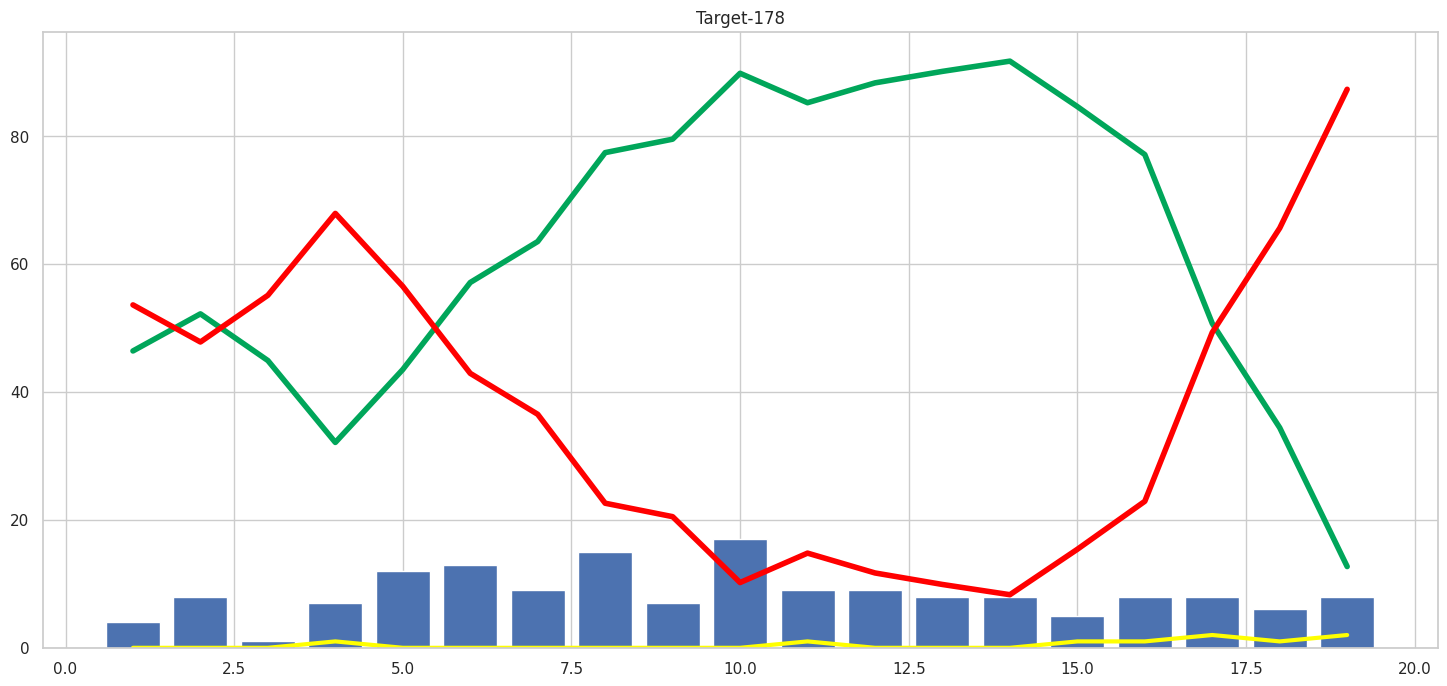

In [176]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [177]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [178]:
delivery_df['city'].unique()

array(['Hyderabad', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai', 'Kolkata',
       'Delhi', 'Pune', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

In [179]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))